# Response fo filters
The goal of this notebook is to study the response of DxO selective tones on each pixels of the image

In [80]:
import numpy as np
import matplotlib.pyplot as plt

## response with values of RGB

First, we want to see the response of the filter for each chanel (r,g,b) of a pixel. To do this, we create several images containg levels of red, blue, green, r+b (magenta), r+g (yellow), g+b (cyan), r+g+b (grey)

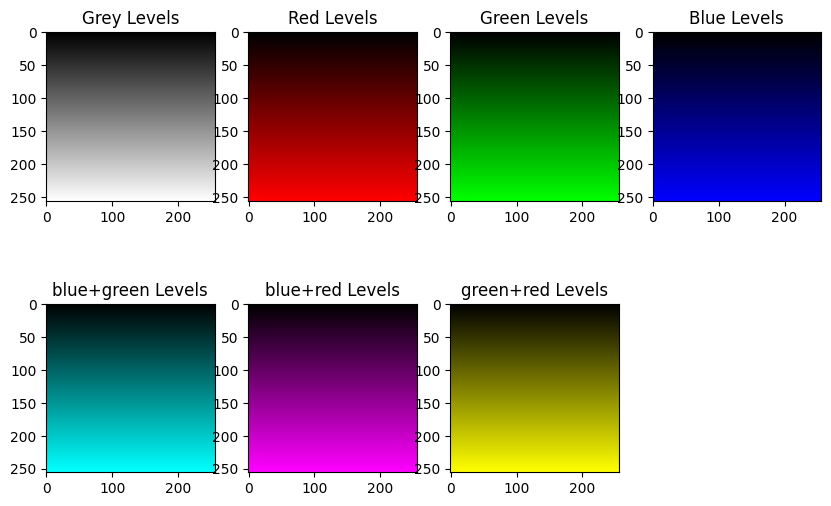

In [81]:
def create_levels_image(size, r=False, b=False, g=False):
    image = np.zeros((size, size, 3), dtype=np.uint8)
    for i in range(size):
        for j in range(size):
            red, green, blue = 0, 0, 0
            if r:
                red = i
            if g:
                green = i
            if b:
                blue = i
            image[i, j] = [red, green, blue]
    return image

# Create an image with all colors at a constant lightness
grey_levels_img = create_levels_image(256, r=True, g=True, b=True)
red_levels_img = create_levels_image(256, r=True)
green_levels_img = create_levels_image(256, g=True)
blue_levels_img = create_levels_image(256, b=True)
blue_green_levels_img = create_levels_image(256, b=True, g=True)
blue_red_levels_img = create_levels_image(256, b=True, r=True)
green_red_levels_img = create_levels_image(256, g=True, r=True)

# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(3, 4, 1)
plt.imshow(grey_levels_img)
plt.title('Grey Levels')
plt.subplot(3, 4, 2)
plt.imshow(red_levels_img)
plt.title('Red Levels')
plt.subplot(3, 4, 3)
plt.imshow(green_levels_img)
plt.title('Green Levels')
plt.subplot(3, 4, 4)
plt.imshow(blue_levels_img)
plt.title('Blue Levels')
plt.subplot(3, 4, 5)
plt.imshow(blue_green_levels_img)
plt.title("blue+green Levels")
plt.subplot(3, 4, 6)
plt.imshow(blue_red_levels_img)
plt.title("blue+red Levels")
plt.subplot(3, 4, 7)
plt.imshow(green_red_levels_img)
plt.title("green+red Levels")
plt.show()

# save the images
plt.imsave('grey_levels.tif', grey_levels_img, format='tiff')
plt.imsave('red_levels.tif', red_levels_img, format='tiff')
plt.imsave('green_levels.tif', green_levels_img, format='tiff')
plt.imsave('blue_levels.tif', blue_levels_img, format='tiff')
plt.imsave('blue_green_levels.tif', blue_green_levels_img, format='tiff')
plt.imsave('blue_red_levels.tif', blue_red_levels_img, format='tiff')
plt.imsave('green_red_levels.tif', green_red_levels_img, format='tiff')

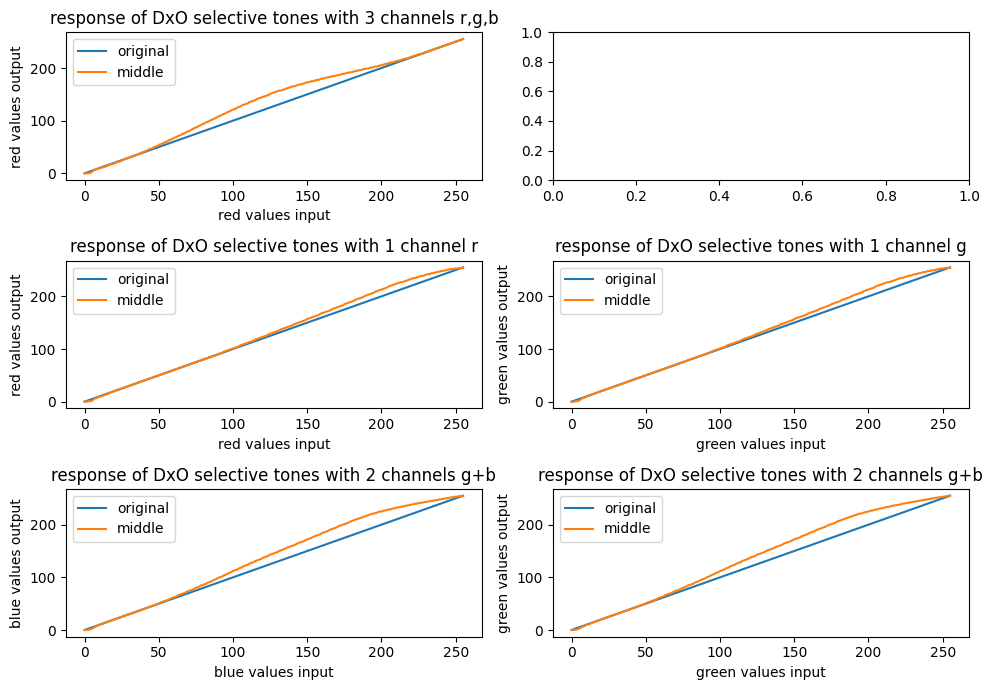

In [82]:
original_greys = plt.imread("grey_levels.tif")
middle_greys = plt.imread("grey_levels_middle_50.tif")

original_reds = plt.imread("red_levels.tif")
middle_reds = plt.imread("red_levels_middle_50.tif")

original_green = plt.imread("green_levels.tif")
middle_green = plt.imread("green_levels_middle_50.tif")

original_blue_green = plt.imread("blue_green_levels.tif")
middle_blue_green = plt.imread("blue_green_levels_middle_50.tif")

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 7)

axs[0, 0].plot(original_greys[:,0, 0], label="original")
axs[0, 0].plot(middle_greys[:,0, 0], label="middle")
axs[0, 0].legend()
axs[0, 0].set_title("response of DxO selective tones with 3 channels r,g,b")
axs[0, 0].set_ylabel("red values output")
axs[0, 0].set_xlabel("red values input")

axs[1, 0].plot(original_reds[:,0, 0], label="original")
axs[1, 0].plot(middle_reds[:,0, 0], label="middle")
axs[1, 0].legend()
axs[1, 0].set_title("response of DxO selective tones with 1 channel r")
axs[1, 0].set_ylabel("red values output")
axs[1, 0].set_xlabel("red values input")

axs[1, 1].plot(original_green[:,0, 1], label="original")
axs[1, 1].plot(middle_green[:,0, 1], label="middle")
axs[1, 1].legend()
axs[1, 1].set_title("response of DxO selective tones with 1 channel g")
axs[1, 1].set_ylabel("green values output")
axs[1, 1].set_xlabel("green values input")

axs[2, 0].plot(original_blue_green[:,0, 2], label="original")
axs[2, 0].plot(middle_blue_green[:,0, 2], label="middle")
axs[2, 0].legend()
axs[2, 0].set_title("response of DxO selective tones with 2 channels g+b")
axs[2, 0].set_ylabel("blue values output")
axs[2, 0].set_xlabel("blue values input")

axs[2, 1].plot(original_blue_green[:,0, 1], label="original")
axs[2, 1].plot(middle_blue_green[:,0, 1], label="middle")
axs[2, 1].legend()
axs[2, 1].set_title("response of DxO selective tones with 2 channels g+b")
axs[2, 1].set_ylabel("green values output")
axs[2, 1].set_xlabel("green values input")

plt.tight_layout()
plt.show()

As we can see, the response is the same for channel green, red or blue (by comparing figure on the same line) but the response is not the same according to the number of channels which are not null on a pixel. This observation leads us to think that DxO Selective Tones works accrding to the lightness and not directly to the value on each channel separatly. 

## response with the lightness

In [83]:
# def compute_rgb_lightness(image):
#     lightness = np.zeros((image.shape[0], image.shape[1]), dtype=np.float64)
#     for i in range(image.shape[0]):
#         for j in range(image.shape[1]):
#             r = float(image[i,j,0]) * 0.2126
#             g = float(image[i,j,1]) * 0.7152
#             b = float(image[i,j,2]) * 0.0722
#             lightness[i, j] = r+g+b
#     return lightness

def compute_rgb_lightness(image):
    lightness = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            maxima = int(max(image[i,j,0], image[i,j,1], image[i,j,2]))
            minima = int(min(image[i,j,0], image[i,j,1], image[i,j,2]))
            lightness[i, j] = (maxima + minima)/2
    return lightness
    

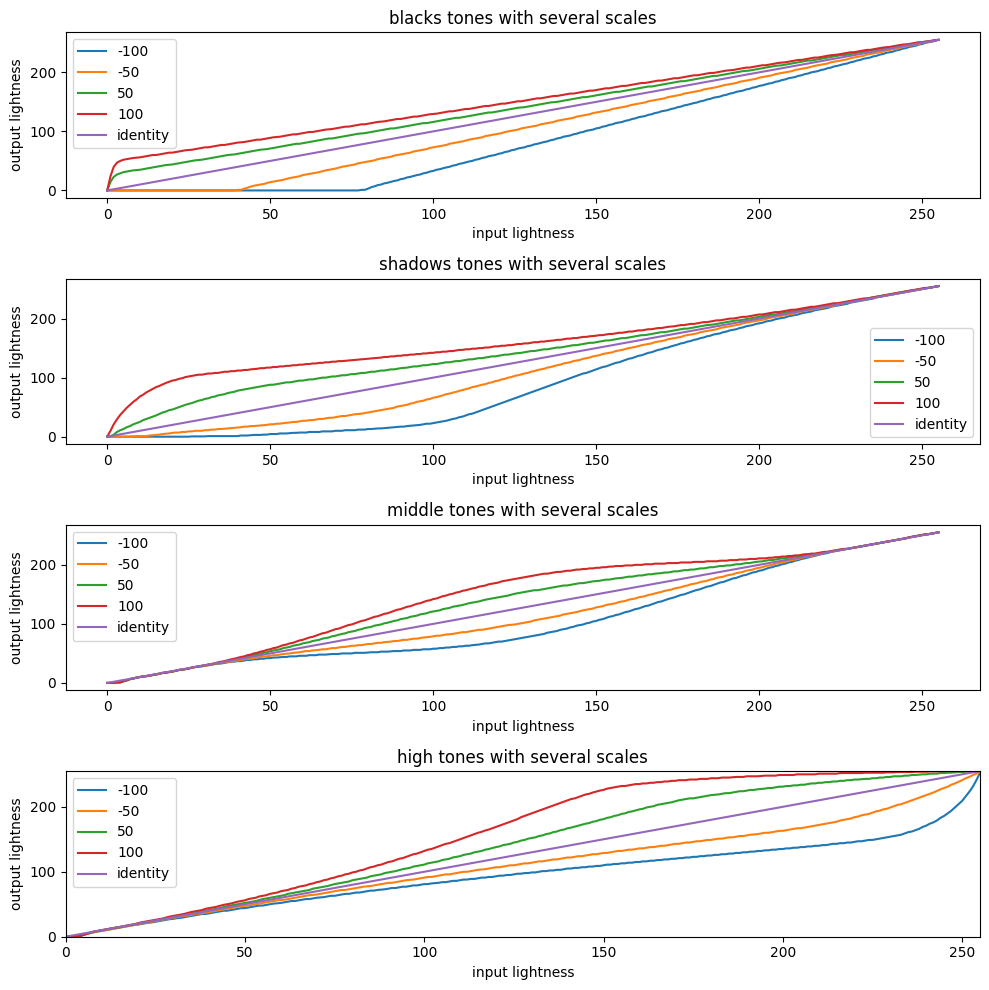

In [84]:
scales = [-100, -50, 50, 100]
tones = ["blacks", "shadows", "middle", "high"]
plt.figure(figsize=(10,10))
dict_lightness = dict()
dict_lightness["grey_levels.tif"] = compute_rgb_lightness(original_greys)[:, 0] # store dict_lightness of each files

for idx, tone in  enumerate(tones):
    plt.subplot(len(tones), 1, idx+1)
    for scale in scales:
        filaneme = f"grey_levels_{tone}_{scale}.tif"
        image = plt.imread(filaneme)
        lightness = compute_rgb_lightness(image)
        dict_lightness[filaneme] = compute_rgb_lightness(image)[:, 0]
        plt.plot(dict_lightness["grey_levels.tif"], dict_lightness[filaneme], label=str(scale))
        plt.xlabel("input lightness")
        plt.ylabel("output lightness")
    
    x = np.linspace(0, 255, 100)
    plt.plot(x, x, label="identity")
    plt.legend()
    plt.title(f"{tone} tones with several scales")
    
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.legend()
plt.show()

The results seem to show that the model relies on the lightness of a pixel to make a correction. The curves displayed resemble the bezier curves usually used in colorimetry. Furthermore, the application of the filter according to the settings between -100 and 10 appears to be linear.

# How to reproduce the same results?

In order to reproduce the same result, we will focus only on the high topnes settings (the same idea can be applied on middle, shadow and black settings). We will empirically choose parameters for a bezier model of degree 3 until you get results close to those you want.

In [85]:
def bezier_curve(t, p0, p1, p2, p3):
    t = (np.array(t)-min(t))/(max(t)-min(t))
    x0, y0, x1, y1, x2, y2, x3, y3 = p0[0], p0[1], p1[0], p1[1], p2[0], p2[1], p3[0], p3[1]
    x = (((1 - t) * ((1 - t) * ((1 - t) * x0 + t * x1) + t * ((1 - t) * x1 + t * x2)) +  t * ((1 - t) * ((1 - t) * x1 + t * x2) + t * ((1 - t) * x2 + t * x3))))
    y = (((1 - t) * ((1 - t) * ((1 - t) * y0 + t * y1) + t * ((1 - t) * y1 + t * y2)) + t * ((1 - t) * ((1 - t) * y1 + t * y2) + t * ((1 - t) * y2 + t * y3))))
    return x * 255, y * 255


## reproduce for high tones =100

In order to find the best coefficients for the bezier model, we empricially try different values on the website desmos.com, the best one is display below:
![Alt text](test_bezier_model.png)

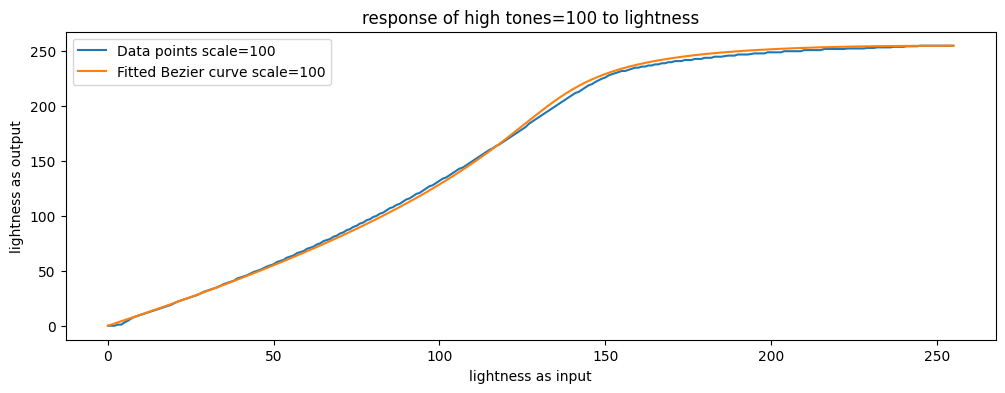

In [90]:


# Define the variables
x = np.arange(256)
y100= dict_lightness["grey_levels_high_100.tif"]
pred_x100, pred_y100 = bezier_curve(x, (1., 1.), (0.3, 1.), (0.75, 0.75), (0., 0.))

plt.figure(figsize=(12,4))
plt.plot(x, y100, label='Data points scale=100')
plt.plot(pred_x100, pred_y100, label='Fitted Bezier curve scale=100')

plt.title("response of high tones=100 to lightness")
plt.xlabel('lightness as input')
plt.ylabel('lightness as output')
plt.legend()
plt.show()

## reproduce for high tones =-100

We searche other coefficients with the same bezier model (degree 3) to fit with high tones at -100:

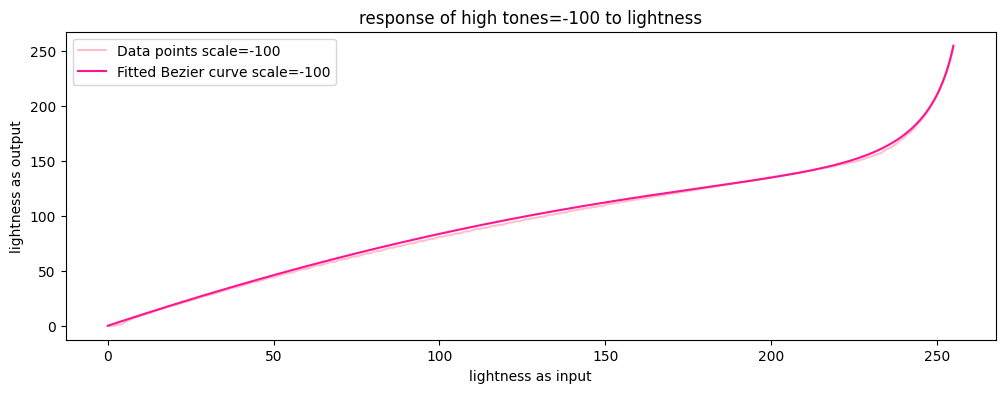

In [87]:
y_100 = dict_lightness["grey_levels_high_-100.tif"]
pred_x_minus_100, pred_y_minus_100 = bezier_curve(x, (1., 1.), (0.95, 0.3), (0.75, 0.75), (0., 0.))

plt.figure(figsize=(12,4))

plt.plot(x, y_100, label='Data points scale=-100', color='pink')
plt.plot(pred_x_minus_100, pred_y_minus_100, label='Fitted Bezier curve scale=-100', color='deeppink')

plt.title("response of high tones=-100 to lightness")
plt.xlabel('lightness as input')
plt.ylabel('lightness as output')
plt.legend()
plt.show()

## reproduce for all high tones values


Since we have found coefficients of the bezier model for -100 and 100 values of high tones, and because of the application of the filter seems to be linear (see analysis at the end of section response with the lightness) we can choose a linear combination of our beizer model coefficient from the scale we want between -100 and 100

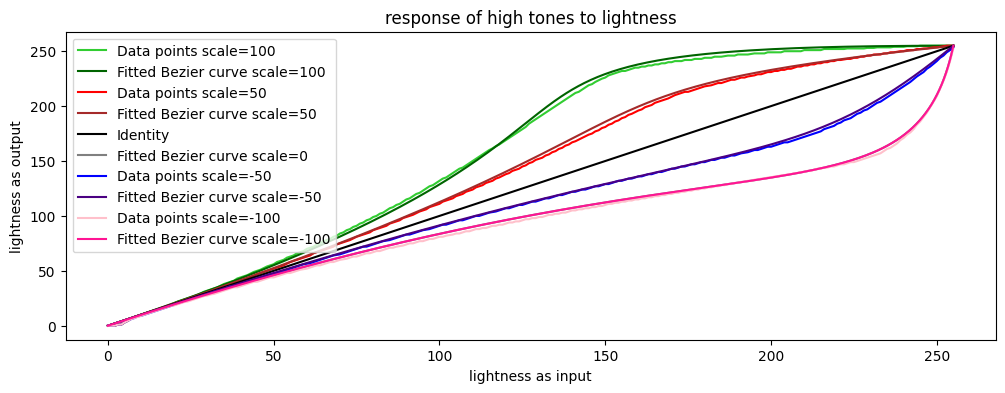

In [88]:
def choose_model_coeff(scale):
    "scale must be between -100 and 100"
    scale = scale/100
    # when scale = 100, coeffs are (0.3, 1.)
    # when scale = -100, coeffs are (0.95, 0.3)
    coeff1 = ((1+scale)/2)*0.3 + ((1-scale)/2)*0.95
    coeff2 = ((1+scale)/2)*1 + ((1-scale)/2)*0.3
    return (coeff1, coeff2)

# Define the variables
x = np.arange(256)
y100= dict_lightness["grey_levels_high_100.tif"]
pred_x100, pred_y100 = bezier_curve(x, (1., 1.), choose_model_coeff(100), (0.75, 0.75), (0., 0.))

y50 = dict_lightness["grey_levels_high_50.tif"]
pred_x50, pred_y50 = bezier_curve(x, (1., 1.), choose_model_coeff(50), (0.75, 0.75), (0., 0.))

pred_x0, pred_y0 = bezier_curve(x, (1., 1.), choose_model_coeff(-100), (0.75, 0.75), (0., 0.))

y_50 = dict_lightness["grey_levels_high_-50.tif"]
pred_x_minus_50, pred_y_minus_50 = bezier_curve(x, (1., 1.), choose_model_coeff(-50), (0.75, 0.75), (0., 0.))

y_100 = dict_lightness["grey_levels_high_-100.tif"]
pred_x_minus_100, pred_y_minus_100 = bezier_curve(x, (1., 1.), (0.95, 0.3), (0.75, 0.75), (0., 0.))

plt.figure(figsize=(12,4))
plt.plot(x, y100, label='Data points scale=100', color='limegreen')
plt.plot(pred_x100, pred_y100, label='Fitted Bezier curve scale=100', color='darkgreen')

plt.plot(x, y50, label='Data points scale=50', color='red')
plt.plot(pred_x50, pred_y50, label='Fitted Bezier curve scale=50', color='brown')

plt.plot(x, x, label='Identity', color='black')
plt.plot(pred_x0, pred_y0, label='Fitted Bezier curve scale=0', color='grey')

plt.plot(x, y_50, label='Data points scale=-50', color='blue')
plt.plot(pred_x_minus_50, pred_y_minus_50, label='Fitted Bezier curve scale=-50', color='indigo')

plt.plot(x, y_100, label='Data points scale=-100', color='pink')
plt.plot(pred_x_minus_100, pred_y_minus_100, label='Fitted Bezier curve scale=-100', color='deeppink')

plt.title("response of high tones to lightness")
plt.xlabel('lightness as input')
plt.ylabel('lightness as output')
plt.legend()
plt.show()

The model found seems to fit very well to the real model. from these results, we can assume that the DxO Selective Tones function seems to corresponds to presets for the tone curve.